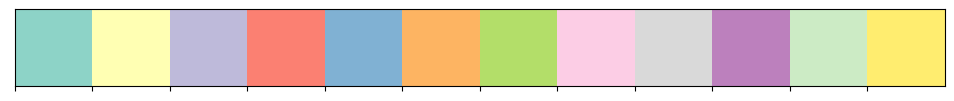

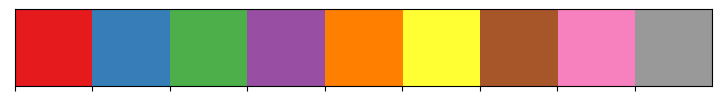

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
listcolor = sns.color_palette("Set3")
sns.palplot(listcolor) # Plotting your palette!
listcolor2 = sns.color_palette("Set1")
sns.palplot(listcolor2)

In [256]:
df1 = pd.read_csv('CSV/vad-doa-648b54891cdef061b01005b4.csv',sep=';')
df2 = pd.read_csv('CSV/segmentation-648b54891cdef061b01005b4.csv',sep=';')
df3 = pd.read_csv('CSV/apm-648b54891cdef061b01005b4.csv',sep=';')
df4 = pd.read_csv('CSV/head-sight-648b54891cdef061b01005b4.csv',sep=';')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


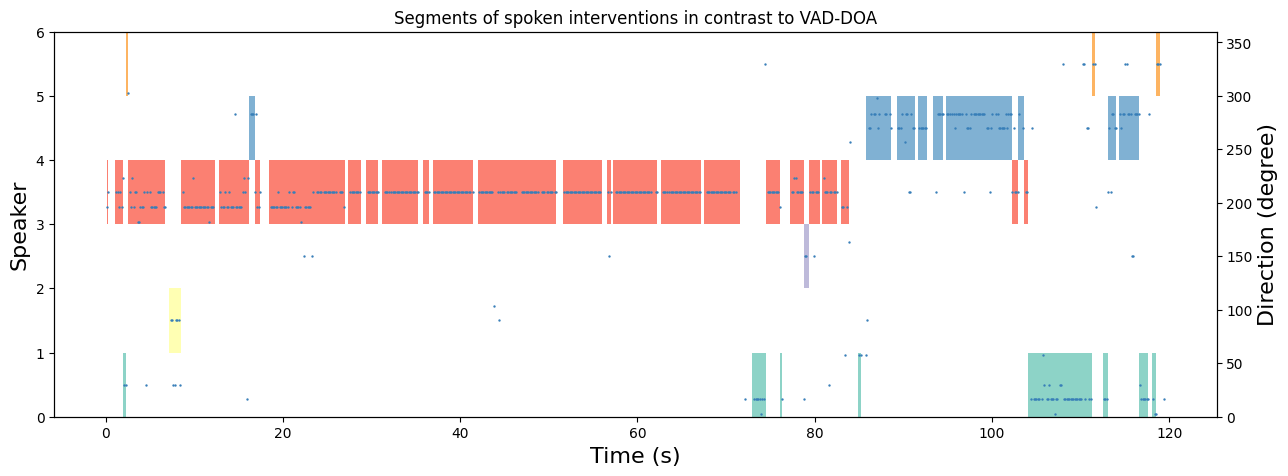

In [257]:
t_df1 = df1.loc[df1['speech_count'] > 10]

fig, ax = plt.subplots(figsize=(15,5))
ax2 = ax.twinx()
for i in range(0,6):
    t_df2 = df2.loc[df2["active_voice"] == i+1]
    ax.broken_barh([(x,y) for x,y in zip(t_df2['start'],t_df2['speaking_time'])], (i, 1), facecolors=listcolor[i])
#sns.scatterplot(x='start', y='direction', data=t_df1, ax=ax2, style=1)
ax2.scatter(t_df1["start"], t_df1["direction"], 0.5, listcolor2[1])
#set title
plt.title("Segments of spoken interventions in contrast to VAD-DOA")
#set x label
ax2.set_xlabel('Time (s)', fontsize=16)
#set y label
ax2.set_ylabel('Direction (degree)', fontsize=16)
#set x label
ax.set_xlabel('Time (s)', fontsize=16)
#set y label
ax.set_ylabel('Speaker', fontsize=16)
ax2.set_ylim([0,360])
ax.set_ylim([0,6])
plt.show()

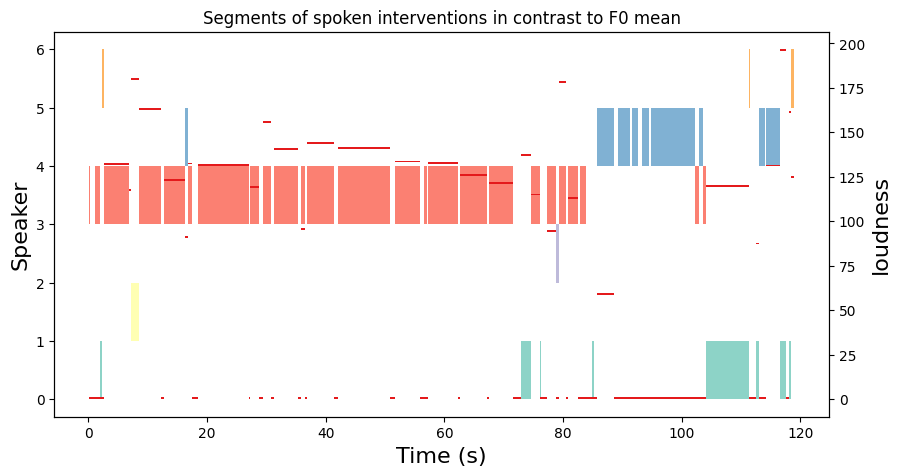

In [258]:
df2_3 = pd.concat([df2, df3[['F0final_sma_maxPos',
       'F0final_sma_minPos', 'F0final_sma_amean', 'F0final_sma_stddev',
       'pcm_loudness_sma_maxPos', 'pcm_loudness_sma_minPos',
       'pcm_loudness_sma_amean', 'pcm_loudness_sma_stddev',
       'jitterLocal_sma_maxPos', 'jitterLocal_sma_minPos',
       'jitterLocal_sma_amean', 'jitterLocal_sma_stddev',
       'jitterDDP_sma_maxPos', 'jitterDDP_sma_minPos', 'jitterDDP_sma_amean',
       'jitterDDP_sma_stddev', 'shimmerLocal_sma_maxPos',
       'shimmerLocal_sma_minPos', 'shimmerLocal_sma_amean',
       'shimmerLocal_sma_stddev', 'F0final__Turn_numOnsets',
       'F0final__Turn_duration']]], axis=1)

F0final_sma_amean = df2_3['F0final_sma_amean'].values
# remover duplicados
F0final_sma_amean = np.unique(F0final_sma_amean)
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
for i in range(0,6):
    t_df2 = df2.loc[df2["active_voice"] == i+1]
    ax.broken_barh([(x,y) for x,y in zip(t_df2['start'],t_df2['speaking_time'])], (i, 1), facecolors=listcolor[i])
for i in F0final_sma_amean:
    t_df2_3 = df2_3.loc[df2_3["F0final_sma_amean"] == i]
    ax2.broken_barh([(x,y) for x,y in zip(t_df2_3['start'],t_df2_3['speaking_time'])], (i, 1), facecolors=listcolor2[0])
# set legend color
ax.plot([], [], color=listcolor2[0], label='mean')
plt.title("Segments of spoken interventions in contrast to F0 mean")
#set x label
ax.set_xlabel('Time (s)', fontsize=16)
#set y label
ax2.set_ylabel('loudness', fontsize=16)
#set y label
ax.set_ylabel('Speaker', fontsize=16)
plt.show()

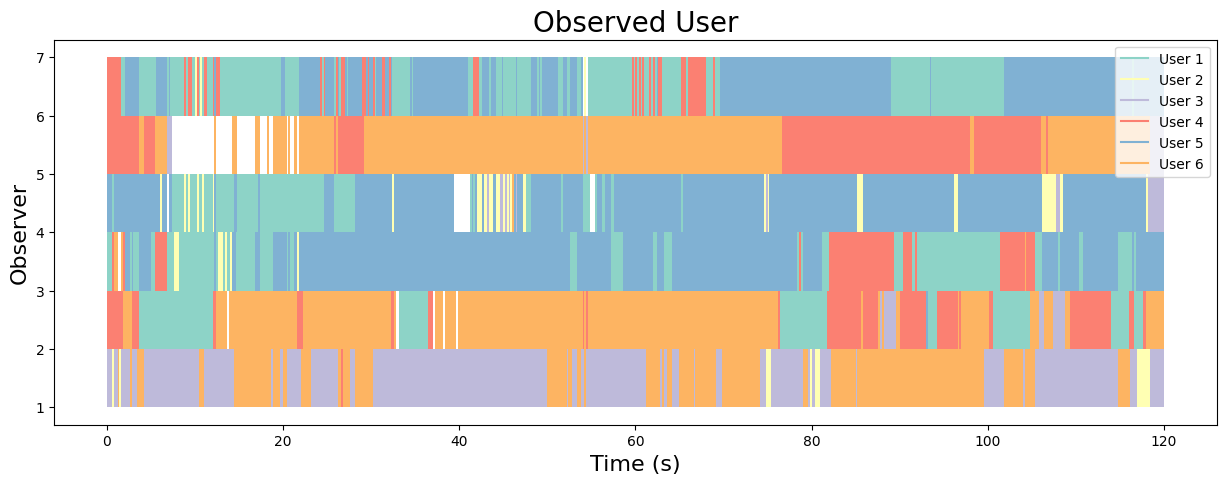

In [259]:
users = df4.pop('users')
import ast
for i, measure in enumerate(users):
    m = ast.literal_eval(measure)
    for j in m.keys():
        df4.loc[df4.index == i, int(j)] = True
for i, measure in enumerate(users):
    m = ast.literal_eval(measure)
    for j in m.keys():
        df4.loc[df4.index == i, str(f"{j}-x")] = m[j]['x']
        df4.loc[df4.index == i, str(f"{j}-y")] = m[j]['y']
        df4.loc[df4.index == i, str(f"{j}-w")] = m[j]['width']
        df4.loc[df4.index == i, str(f"{j}-h")] = m[j]['height']
        df4.loc[df4.index == i, str(f"{j}-is_confirmed")] = m[j]['is_confirmed']
        df4.loc[df4.index == i, str(f"{j}-is_tentative")] = m[j]['is_tentative']
        df4.loc[df4.index == i, str(f"{j}-distance")] = m[j]['distance']
        df4.loc[df4.index == i, str(f"{j}-user_min_distance")] = m[j]['user_min_distance']
try:
    df4["1-user_min_distance"] = df4["1-user_min_distance"].astype(float)
except KeyError:
    pass
try:
    df4["2-user_min_distance"] = df4["2-user_min_distance"].astype(float)
except KeyError:
    pass
try:
    df4["3-user_min_distance"] = df4["3-user_min_distance"].astype(float)
except KeyError:
    pass
try:
    df4["4-user_min_distance"] = df4["4-user_min_distance"].astype(float)
except KeyError:
    pass
try:
    df4["5-user_min_distance"] = df4["5-user_min_distance"].astype(float)
except KeyError:
    pass
try:
    df4["6-user_min_distance"] = df4["6-user_min_distance"].astype(float)
except KeyError:
    pass
try:
    df4["7-user_min_distance"] = df4["7-user_min_distance"].astype(float)
except KeyError:
    pass
try:
    df4["8-user_min_distance"] = df4["8-user_min_distance"].astype(float)
except KeyError:
    pass


fig, ax = plt.subplots(figsize=(15,5))
for i in df4.index:
    for j in range(1,7):
        if df4[j][i] == True:
            aux = df4.loc[df4[j] == True, ['start',f'{j}-x',f'{j}-y',f'{j}-w',f'{j}-h',f'{j}-is_confirmed',f'{j}-is_tentative',f'{j}-distance',f'{j}-user_min_distance']]
            aux.columns = ['start','x','y','w','h','is_confirmed','is_tentative','distance','user_min_distance']
            try:
                observed = int(aux["user_min_distance"][i])
            except ValueError:
                continue
            #print(i, j, aux["user_min_distance"][i], observed)
            ax.broken_barh([(aux["start"][i], 0.2)], (j, 1), facecolors=listcolor[observed-1])

#set title
ax.set_title('Observed User', fontsize=20)
#set x label
ax.set_xlabel('Time (s)', fontsize=16)
#set y label
ax.set_ylabel('Observer', fontsize=16)
# set legend
ax.plot([], [], color=listcolor[0], label='User 1')
ax.plot([], [], color=listcolor[1], label='User 2')
ax.plot([], [], color=listcolor[2], label='User 3')
ax.plot([], [], color=listcolor[3], label='User 4')
ax.plot([], [], color=listcolor[4], label='User 5')
ax.plot([], [], color=listcolor[5], label='User 6')
ax.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


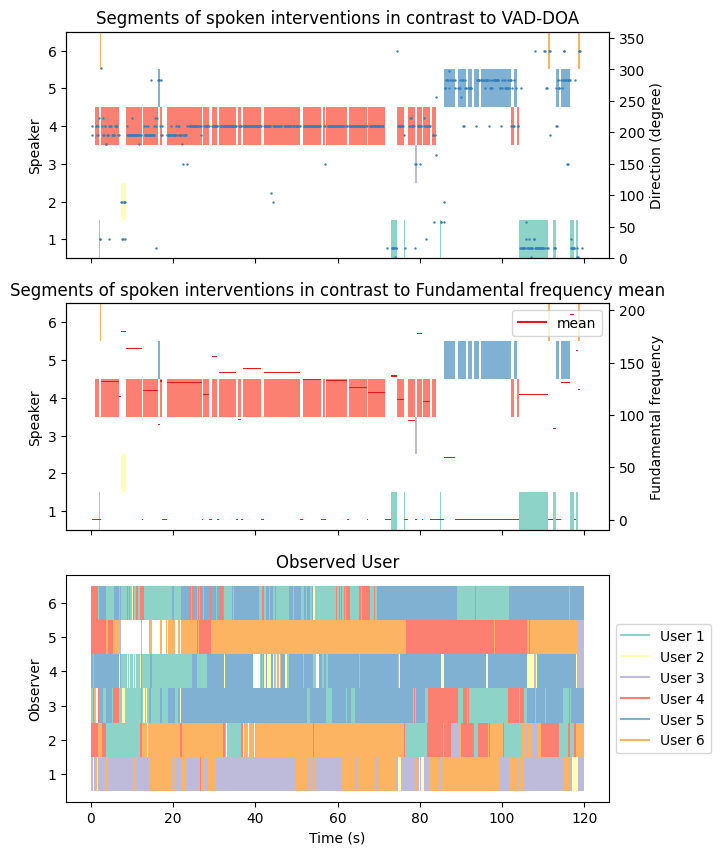

In [261]:
fig, ax = plt.subplots((3), figsize=(7,10), sharex=True)

# chart 1
ax2 = ax[0].twinx()
for i in range(0,6):
    t_df2 = df2.loc[df2["active_voice"] == i+1]
    ax[0].broken_barh([(x,y) for x,y in zip(t_df2['start'],t_df2['speaking_time'])], (i+0.5, 1), facecolors=listcolor[i])
ax2.scatter(t_df1["start"], t_df1["direction"], 0.5, listcolor2[1])

ax[0].set_title('Segments of spoken interventions in contrast to VAD-DOA')
ax2.set_ylabel('Direction (degree)')
ax[0].set_ylabel('Speaker')
ax2.set_ylim([0,360])
ax[0].set_ylim([0.5,6.5])

#chart 2
ax2 = ax[1].twinx()
for i in range(0,6):
    t_df2 = df2.loc[df2["active_voice"] == i+1]
    ax[1].broken_barh([(x,y) for x,y in zip(t_df2['start'],t_df2['speaking_time'])], (i+0.5, 1), facecolors=listcolor[i])
for i in F0final_sma_amean:
    t_df2_3 = df2_3.loc[df2_3["F0final_sma_amean"] == i]
    ax2.broken_barh([(x,y) for x,y in zip(t_df2_3['start'],t_df2_3['speaking_time'])], (i, 1), facecolors=listcolor2[0])

ax[1].set_title('Segments of spoken interventions in contrast to Fundamental frequency mean')
ax2.set_ylabel('Fundamental frequency')
ax[1].set_ylabel('Speaker')
ax[1].set_ylim([0.5,6.5])

ax[1].plot([], [], color=listcolor2[0], label='mean')
ax[1].legend()

# chart 3
for i in df4.index:
    for j in range(1,7):
        if df4[j][i] == True:
            aux = df4.loc[df4[j] == True, ['start',f'{j}-x',f'{j}-y',f'{j}-w',f'{j}-h',f'{j}-is_confirmed',f'{j}-is_tentative',f'{j}-distance',f'{j}-user_min_distance']]
            aux.columns = ['start','x','y','w','h','is_confirmed','is_tentative','distance','user_min_distance']
            try:
                observed = int(aux["user_min_distance"][i])
            except ValueError:
                continue
            #print(i, j, aux["user_min_distance"][i], observed)
            ax[2].broken_barh([(aux["start"][i], 0.2)], (j-0.5, 1), facecolors=listcolor[observed-1])

#set title
ax[2].set_title('Observed User')
#set x label
ax[2].set_xlabel('Time (s)')
#set y label
ax[2].set_ylabel('Observer')
# set legend
ax[2].plot([], [], color=listcolor[0], label='User 1')
ax[2].plot([], [], color=listcolor[1], label='User 2')
ax[2].plot([], [], color=listcolor[2], label='User 3')
ax[2].plot([], [], color=listcolor[3], label='User 4')
ax[2].plot([], [], color=listcolor[4], label='User 5')
ax[2].plot([], [], color=listcolor[5], label='User 6')
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()